# Regressions

In [1]:
# import packages you will be using in this lab

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Linear Regression




Now that you have learned how linear regression works, let’s try it on an example of real-world data.

Imagine yourself working ss a data analysit for a computer manufacturing company. You are given a dataset on computer sales for each quarter beteen the year 2015 to 2019. The company is relying on you to tell whether the sales is going up, going down, or stayed the same. The company also would like you to predict its sales in 2025. 

The dataset computersales.csv can be download from Canvas.



In [2]:
# Create dataframes computer_df from the data and explore the data
# Print out the dataframe to visually inspect the data
# try other data exploration methods to explore the data

computersales_df=pd.read_csv("C:/Users/lisaj/OneDrive/Documents/Documents/MIS 536/Lab4_dataset/Lab4_dataset/computersales.csv")
print(computersales_df.head())
print(computersales_df.dtypes)
print(computersales_df.count())
print(computersales_df.columns)
print(computersales_df.info())



   year  quarter  sales
0  2015        1   4009
1  2015        2   4321
2  2015        3   4224
3  2015        4   3944
4  2016        5   4123
year       int64
quarter    int64
sales      int64
dtype: object
year       20
quarter    20
sales      20
dtype: int64
Index(['year', 'quarter', 'sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year     20 non-null     int64
 1   quarter  20 non-null     int64
 2   sales    20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes
None


In [3]:
# For now, we care about the total sales of honey per year. 
# Use the .groupby() method provided by pandas to get the sum of totalsales per year using .sum() function.
# Store this in a variable called sales_per_year.
# Print the total sales for each year

sales_per_year = computersales_df.groupby('year').sales.sum()
print(sales_per_year)

data= [[2015, 16498], [2016, 17332], [2017, 18335], [2018, 18069], [2019, 18263]]

sales_per_year = pd.DataFrame(data, columns = ['year', 'sales'])
print(sales_per_year)


year
2015    16498
2016    17332
2017    18335
2018    18069
2019    18263
Name: sales, dtype: int64
   year  sales
0  2015  16498
1  2016  17332
2  2017  18335
3  2018  18069
4  2019  18263


In [4]:
# Create a variable called X that is the column of years in this sales_per_year DataFrame.
# After creating X, dont' forget to reshape it to get it into the right format, using .reshape(-1, 1)
# Create a variable called y that is the sales column in the sales_per_year data frame.
# print X and y to check on our work.

X = sales_per_year[['year']]

X = sales_per_year.year.to_numpy().reshape(-1, 1)

y= sales_per_year['sales']

y = sales_per_year.sales.to_numpy()

print(X, y)


[[2015]
 [2016]
 [2017]
 [2018]
 [2019]] [16498 17332 18335 18069 18263]


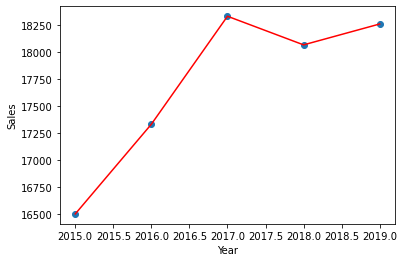

In [5]:
# Using plt.scatter(), plot y vs X as a scatterplot.
# Put appropriate lables on X-axis and Y-axis
# Display the plot to see whether there is linear relationship between the variables.

plt.scatter(sales_per_year.year, sales_per_year.sales)
plt.plot(sales_per_year.year, sales_per_year.sales, c="red")
plt.xlabel("Year")
plt.ylabel("Sales")

plt.show()



In [6]:
# Create a linear regression model computer_regr.
# Fit the model to the data by using .fit(). 
# Print out the slope of the line and the intercept of the line.
# Computer a store predictions from computer_reg and store it in a list called y_predict.
# Print out y_predict to check your results.
# Calculate and print out R-squre

computer_regr=LinearRegression()
computer_regr.fit(X, y)
print("\nCoefficient Estimate (beta-1", computer_regr.coef_)
print("\nIntercept (beta-0)", computer_regr.intercept_)
y_predict=computer_regr.predict(X)
print(y_predict)

print("R-square is:", computer_regr.score(X, y, sample_weight=None))



Coefficient Estimate (beta-1 [426.7]

Intercept (beta-0) -842954.5000000001
[16846.  17272.7 17699.4 18126.1 18552.8]
R-square is: 0.7472473726712112


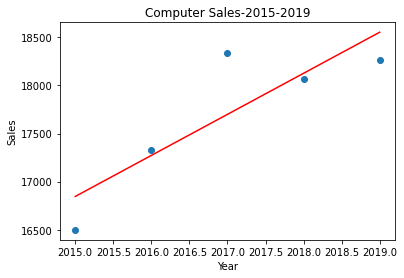

In [7]:
# Plot y_predict vs X as a line, on top of your scatterplot.

plt.scatter(sales_per_year.year, sales_per_year.sales)
plt.plot(sales_per_year.year, y_predict, c="red")
plt.title("Computer Sales-2015-2019")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


In [8]:
# Is sales increasing, decreasing, or stay the same?
# Following this trend, how would the sales of 2025 be like?
# Create a NumPy array called X_future that is the range from 2020 to 2025. Don't forget to reshape it.
# Create a list called future_predict to store predictions for the values of X_future.
# Print out the list to check your answer

# Sales are generally increasing. 
# Sales in 2025 should be over $20,000. 

X_future=np.array(range(2020, 2026, 1))
X_future=X_future.reshape(-1, 1)
print(X_future)

future_predict=computer_regr.predict(X_future)
print(future_predict)

[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]]
[18979.5 19406.2 19832.9 20259.6 20686.3 21113. ]


Text(0, 0.5, 'Sales')

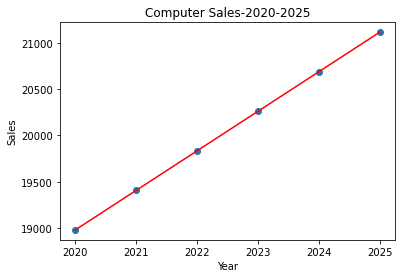

In [9]:
# Plot future_predict vs X_future on a different plot.
# Can you predict what is the sales of 2015 will be?

plt.scatter(X_future, future_predict)
plt.plot(X_future, future_predict, c="red") 
plt.title("Computer Sales-2020-2025")
plt.xlabel("Year")
plt.ylabel("Sales")

#The predicted sales for 2025 are $21,113. I'm assuming that the '1' in 2015 is a typo since we already know from the previous plot that the 2015 sales were $16,500. 


Use your words to interpret your results:



Lessons learned through this exercise:




In [10]:
#Interpretation of results: The sales from 2020-2025 are expected to increase each year between 2020 and 2025.

In [11]:
#Lessons learned through this exercise: I learned many things from this exercise. Most importantly, I how to explore the relationship between the independent and dependent variables and how to transform the variables to predict future values. Additionally, I learned how to visually display the relationship between the independent variable and dependent variable in a linear regression model.

## Multiple Linear Regression



In [12]:
# load the data to dataframe housing_df
# display column/variable names
# review first 5 records in the data
# try other ways to explore the data

housing_df=pd.read_csv("C:/Users/lisaj/OneDrive/Documents/Documents/MIS 536/Lab4_dataset/Lab4_dataset/bostonhousing.csv")

print(housing_df.columns)
print(housing_df.head())
print(housing_df.info())
print(housing_df.describe())


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       

In [13]:
# select columns for regression analysis
# store predictors in X
# store outcome variables in Y

outcome='MEDV'
predictors=['CRIM', 'CHAS', 'RM']

X=housing_df[predictors]
y=housing_df[outcome]


In [14]:
# partition data into training set (80%) and test set (20%)
# name training set X_training, y_training
# name testing set X_test, y_test
# print out each partitioned sub-set to check on your work

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X.shape)
print('\nTraining set:', X_training.shape, '\nTest set:', X_test.shape)


(506, 3)

Training set: (404, 3) 
Test set: (102, 3)


In [15]:
# build regression model
# fit the regression model 
# print coefficients

housing_mlr=LinearRegression()
housing_mlr.fit(X_training, y_training)

print('intercept', housing_mlr.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': housing_mlr.coef_}))

intercept -26.562838524841556
  Predictor  coefficient
0      CRIM    -0.254507
1      CHAS     2.825778
2        RM     7.944484


In [16]:
# validate your model on the testing dataset

y_predicted=housing_mlr.predict(X_test)

# print out the results
print(y_predicted)
print(y_predicted[:5])

# I was not sure if I should print out all of the results or just the first five (as done in the video), so I included code for both possibilities. 

[27.8363832  26.62695726 21.28405183 20.12010767 15.09935311 23.90924436
 26.09989297 21.33128489 23.5123948  24.40499709 25.6096578  28.03978768
 18.9301594  19.40074813 21.22018931 14.94818755 22.3691303  42.61868078
 22.3823069  11.96886071 18.6959124  17.60024393 25.51462677 24.31421934
 23.39884715 16.24127895 21.45626417 21.20736817 33.04374711 14.18325497
 25.68369136 17.91730195 37.25803653 20.57218656 22.23650915 20.44502373
 22.21277739 30.19881814  1.03901306 20.56114724 23.73246845 23.5573449
 25.85731393 20.76397868 19.96942415 24.64400626 37.779099   16.80617421
 21.16228165 24.2633633  27.70699532 23.92200483 24.51259947 23.05289004
 13.84562071 24.69868859 17.40444968 21.87213015 20.82503869 38.87096322
 21.54742656 26.09449741 17.14152818 21.70743932 16.35901874 28.87495244
 39.52391284 25.38773221 21.1547015  19.37347638 23.505512    4.18650185
 11.92473689 26.20351983 22.079634   18.49598249 30.3372797  24.70013026
 24.79307721 30.2042659  24.44531667 21.23247685 30.

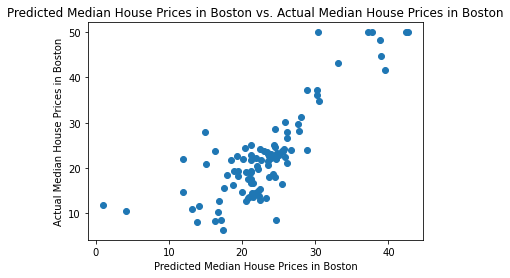

In [17]:
# Plot your predicted value against the actual value in the testing dataset
# lable the x-axis and y-axis accordingly, do not forget to show your results

plt.scatter(y_predicted, y_test)
plt.title("Predicted Median House Prices in Boston vs. Actual Median House Prices in Boston")
plt.xlabel("Predicted Median House Prices in Boston")
plt.ylabel("Actual Median House Prices in Boston")

plt.show()


In [18]:
# print R-square

print(housing_mlr.score(X_test, y_test))
print(housing_mlr.score(X_training, y_training))


0.6409984773834483
0.5231457348579104


Use your words to interpret your results:



Lessons learned through this exercise:





In [19]:
#Interpretation of results: The results are predicted median house prices using per capita crime rate per town, Census tract bounding the Charles River, and number of rooms per dwelling as predictors. As the crime rate goes up, the median house price decreases. If the house in the tract borders the Charles River, the median house price increases. Also, the more rooms there are in a dwelling, the higher the median housing price is.
#The R-squared value for the test model is 64% whereas the R-squared is 52% for the training model. The R-squared value measures the goodness-of-fit in the model. The R-squared value is higher for the test model than it is for the training model. 

In [20]:
# Lessons learned through this exercise: I learned how to partition data into a training and validation set. I also learned how to analyze the impact of three predictors on median housing price based on a U.S. Census data set and determine the R-squared of the test and training models used in this exercise.

In [ ]:
# Extra Credit (10 points): Find out the best model from the 12 predictors in this dataset to predict MEDV
# pay attention to multicollinearity


## Logistic Regression

The file banks.csv includes data on a sample of 20 banks. The "Financial Condition" column records the judgement of an expert on the financial condition of each bank. This outcome variable takes one of two possible values -- weak or strong-- according to the financial condition of the bank. The predictors are two ratios used in the financial analysis of banks: TotLnsLses_Assets is the ratio of total loans and leases to total assets and TotExp_Assets is the ratio of total expenses to total assets. The target is to use the two ratios for classifying the financial condition of a new bank.

Run a logistic regression model (on the entire dataset) that model the status of a bank as a function of the two financial measures provided. Specify the success class as weak (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.

In [22]:
# load the data to data frame banks_df
# display column/variable names
# review first 5 records in the data

banks_df=pd.read_csv("C:/Users/lisaj/OneDrive/Documents/Documents/MIS 536/Lab4_dataset/Lab4_dataset/banks.csv")

print(banks_df.head())
print(banks_df.count())

   Obs  Financial_Condition  TotCap_Assets  TotExp_Assets  TotLnsLses_Assets
0    1                    1            9.7           0.12               0.65
1    2                    1            1.0           0.11               0.62
2    3                    1            6.9           0.09               1.02
3    4                    1            5.8           0.10               0.67
4    5                    1            4.3           0.11               0.69
Obs                    20
Financial_Condition    20
TotCap_Assets          20
TotExp_Assets          20
TotLnsLses_Assets      20
dtype: int64


In [23]:
# Is the data clean?
# Select the predictors to X, outcome variable to y

# The data appears to be clean. I do not see any combined variables or missing values. I do not believe there are any duplicates either. 

X=banks_df[["TotLnsLses_Assets", "TotExp_Assets"]]
y=banks_df["Financial_Condition"]
print(X, y)


    TotLnsLses_Assets  TotExp_Assets
0                0.65           0.12
1                0.62           0.11
2                1.02           0.09
3                0.67           0.10
4                0.69           0.11
5                0.74           0.13
6                0.79           0.10
7                0.63           0.13
8                0.72           0.16
9                0.57           0.16
10               0.43           0.08
11               0.80           0.12
12               0.69           0.07
13               0.53           0.08
14               0.73           0.09
15               0.30           0.09
16               0.49           0.08
17               0.55           0.11
18               0.44           0.08
19               0.51           0.08 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Financial_Condition, dtype: int64


In [24]:
# partition data into training set (60%) and test set (40%)
# name training set X_training, y_training
# name testing set X_test, y_test
# print out each partitioned sub-set to check on your work

X_training, X_test, y_training, y_test=train_test_split(X, y, test_size=0.4, random_state=5)
print(X.shape)
print('\nTraining set:', X_training.shape, '\n Test set:', X_test.shape)




(20, 2)

Training set: (12, 2) 
 Test set: (8, 2)


In [25]:
# Scale the predictor datasets so it has mean = 0 and standard deviation = 1

scaler=StandardScaler()
X_training=pd.DataFrame(scaler.fit_transform(X_training), index=X_training.index, columns=X_training.columns)
                  
print(X_training)
                        
X_test=pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

print(X_test)


    TotLnsLses_Assets  TotExp_Assets
13          -0.526389      -1.025139
18          -1.195213      -1.025139
7            0.216748       0.783929
4            0.662631       0.060302
8            0.885572       1.869370
9           -0.229134       1.869370
0            0.365376       0.422116
16          -0.823644      -1.025139
6            1.405768      -0.301511
15          -2.235605      -0.663325
14           0.959886      -0.663325
3            0.514003      -0.301511
    TotLnsLses_Assets  TotExp_Assets
2            2.000817      -0.431638
5            0.400163       1.541566
17          -0.685994       0.554964
19          -0.914659      -0.924940
12           0.114332      -1.418241
1           -0.285831       0.554964
11           0.743161       1.048265
10          -1.371989      -0.924940


In [26]:
# Create and train the model
# fit the model

banks_df_lr=LogisticRegression()
banks_df_lr.fit(X_training, y_training)


LogisticRegression()

In [27]:
# Analyze the coefficients

print('intercept:', banks_df_lr.intercept_)
print(list(zip(["TotLnsLses_Assets", "TotExp_Assets"], banks_df_lr.coef_[0])))

intercept: [0.50947949]
[('TotLnsLses_Assets', 0.8384044295309269), ('TotExp_Assets', 1.2641532927117796)]


In [28]:
# Make predictions on test data

Thirteen=np.array([-0.526389, -1.025139])
Eighteen=np.array([-1.195213, -1.025139])
Seven=np.array([0.216748, 0.783929])
Four=np.array([0.662631, 0.060302])

sample_banks_df=np.array([Thirteen, Eighteen, Seven, Four])
sample_banks_df=scaler.fit_transform(sample_banks_df)

print(banks_df_lr.predict(sample_banks_df))
print(banks_df_lr.predict_proba(sample_banks_df))




[0 0 1 1]
[[0.74183311 0.25816689]
 [0.86362176 0.13637824]
 [0.05721071 0.94278929]
 [0.10554879 0.89445121]]


In [29]:
# Score the model

print(banks_df_lr.score(X_training, y_training))
print(banks_df_lr.score(X_test, y_test))


0.9166666666666666
0.75


Use your words to interpret your results:



Lessons learned through this exercise:





In [ ]:
#Interpretation of Results: Both TotLnsLses_Assets and TotExp_Assets appear to impact the "financial condition" of a bank. However, TotExp_Assets has a greater impact on a bank's "financial condition" since its coeffcient has a greater value. The financial condition probabilities were calculated for the following banks, Thirteen, Eighteen, Seven, and Four, based on their ratio of total loans and leases 
#to total assets and ratio of total expenses to total assets. According to the results, it appears that banks Thirteen and Eighteen are predicted to have a "not weak" financial condition whereas banks Seven and Four are likely to have a weak financial condition. The probabilities for banks Thirteen and Eighteen have a "not weak" financial condition are above the default cutoff value of 0.5. The probabilities of banks Seven and Four having a weak financial condition 
#are also above the default cutoff value of 0.5. This means that I can be confident that the linear regression model is making reliable predictions for the financial status of the four banks I selected.

In [ ]:
#Lessons learned through this exercise: I learned how to make predictions for a dependent variable that has two values, 1 and 0. Also, I learned how to understand the likelihood of a bank's financial status based on the probabitlies of its condition being assigned as weak or otherwise by looking at the probabilities associated with the bank being assigned '1' or '0.'